# SVD for Low Rank Images

## Import Libraries

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# Import Image and convert

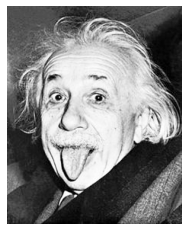

In [198]:
# Import the Picture
pic = Image.open('Einstein.jpg')

# we need to convert it to Interger precision
pic = np.array(pic).astype(np.int16)
pic =(pic)*(-1) 
plt.imshow(pic, cmap='Greys')
plt.axis('off')
plt.show()

# Apply SVD and look at the Sigma Components

The SVD is a matrix decomposition method that can work on non-squared matrixs. The result is U with shape MxN and V^{t} is the tanspose NxN matrix, both are the orthonormal eignvectors (left and right sides). And S, also known as Sigma is the singular values with size NxN. 
A matrix can be decomposed and recreated from the decomposed matrices, which allows for the ability to reduce the rank and recreate a reduced rank matrix

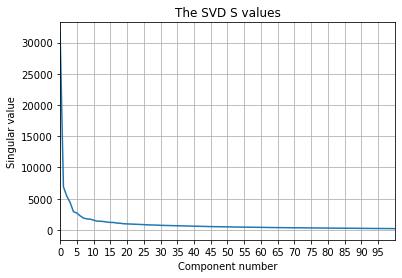

The shape of the original matrix is (286, 230), and the SVD elements shapes are U:(286, 286), S:(230, 230), and V:(230, 230).


In [196]:
# Apply SVD
U,S,V = np.linalg.svd( pic )

# plot the spectrum
plt.plot(S,'-')
plt.xlim([0,100]) # limited to 100 as the rest would be dificult for visulisation, but would get closer to 0.
plt.xticks(range(0,100,5))
plt.xlabel('Component number')
plt.ylabel('Singular value')
plt.title('The SVD S values')
plt.grid()
plt.show()

print('The shape of the original matrix is {}, and the SVD elements shapes are U:{}, S:{}, and V:{}.'.format(pic.shape, U.shape, np.diag(S).shape, V.shape))

# Functions to calculate the low rank for percentage of blurred details.

One of the best way to detect the computerised blur is the use of Laplacian function from the CV library.

In [192]:
#function to recreate the low rank image.
def low_rank(u,s,vt,rank):
    u = u[:,:rank]
    vt = vt[:rank,:]
    s = s[:rank]
    
    low_rank = u @ np.diag(s) @ vt
    return low_rank

#a function to calculate the rank required for a certain percentage
def rank_r(matrix, toll):
    blur_score=cv2.Laplacian(matrix, cv2.CV_16S, ksize=3).var()
    u,s,vt = np.linalg.svd(matrix)
    tollerance=True
    count=0
    percent=0
    while(percent<=toll):
        rank_img = (low_rank(u,s,vt,count)).astype(np.int16)
        rank_blur = cv2.Laplacian(rank_img, cv2.CV_16S, ksize=3).var()
        percent = ((rank_blur)/(blur_score)) *100
        count+=1
    return count


## Running the above functions

In [193]:
#Define the percentage level for blurred image in the reconsructed low rank image
percent = 70
rank = rank_r(pic,percent)
print('For the {}% of details the rank need to be {}.'.format(percent, rank))

For the 70% of details the rank need to be 61.


# Compare Low rank Image with Original

Recreating the low rank image to the rank calculated for the percentage given for amout of blur allowed.

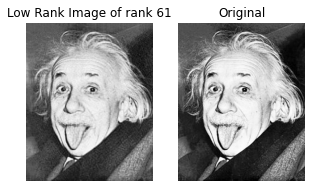

In [197]:
u,s,v =np.linalg.svd(pic)
low_pic = low_rank(u,s,v, rank)
low_pic = low_pic.astype(np.int16)

plt.figure(figsize=(5,10))
plt.subplot(1,2,1)
plt.imshow(low_pic, cmap='Greys')
plt.title('Low Rank Image of rank {}'.format(rank))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(pic, cmap='Greys')
plt.title('Original')
plt.axis('off')
plt.show()
